In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [181]:
yolo = cv2.dnn.readNetFromDarknet('/content/yolov3.cfg','/content/yolov3.weights')

In [182]:
import os
classes = []
with open('/content/coco.names','r') as f:
  classes=f.read().splitlines()

In [183]:
len(classes)

80

In [239]:
img = cv2.imread('/content/NJR.jpeg')
print(img.shape)
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop=False)

(1334, 2000, 3)


In [240]:
width=img.shape[0]
height=img.shape[1]

In [241]:
blob.shape

(1, 3, 320, 320)

In [242]:
type(blob)

numpy.ndarray

In [243]:
i=blob[0].reshape(320,320,3)

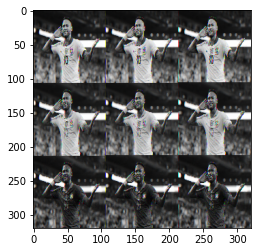

In [244]:
plt.imshow(i)

In [245]:
yolo.setInput(blob)

In [246]:
output_layer_names=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layer_names)

In [247]:
boxes = []
confidences = []
class_ids = []
for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id=np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.5:
      box = detection[0:4] * np.array([width,height, width, height])
      (centerX, centerY, w, h) = box.astype("int")
      x = int(centerX - (w / 2))
      y = int(centerY - (h / 2))
      boxes.append([x, y, int(w), int(h)])
      confidences.append(float(confidence))
      class_ids.append(class_id)


In [248]:
len(boxes)

1

In [249]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.3)

In [250]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [251]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i],2))
  color = colors[i]
  cv2.rectangle(img, (x,y),(x+w,y+h),color, 2)
  cv2.putText(img,label+' '+confi, (x,y+20), font, 2, (255,255,255),2)

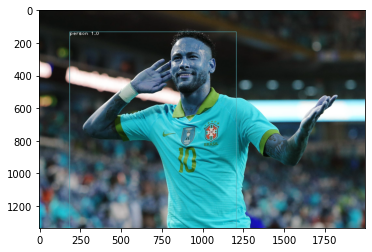

In [252]:
plt.imshow(img)